In [1]:
from modelo_tweets import *

In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /u01/user8/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-d

In [144]:
TC(model.f_inicio)

array([1., 1., 0., 0., 0., 0., 0., 1.])

In [143]:
partidos=pd.read_csv('entradas/Partidos.csv')
manifestaciones=pd.read_csv('entradas/Manifestaciones.csv')
f_especiales=pd.read_csv('entradas/FechasEspeciales.csv')
masas=pd.read_csv('entradas/masas.csv')
masas.fecha=pd.to_datetime(masas.fecha)

partidos_M=pd.to_datetime(partidos['Fecha'].dropna())
partidos_S=pd.to_datetime(partidos['Fecha.1'].dropna())
manifestaciones=pd.to_datetime(manifestaciones['Fecha'].dropna())
f_especiales=pd.to_datetime(f_especiales[['2019','2020']].values.flatten())
f_especiales=f_especiales[~f_especiales.isna()]

def TC(t):
    return np.array([        
                     t.weekday()/6.0,
                     (t.hour > 12)*1,
                     (pd.Timestamp(t.date()) == partidos_S).sum(),
                     (pd.Timestamp(t.date()) == partidos_M).sum(),
                     (pd.Timestamp(t.date()) == manifestaciones).sum(),
                     (pd.Timestamp(t.date()) == f_especiales).sum(),   
                     np.nan_to_num(masas[masas.fecha == pd.Timestamp(t.date())].CreatedAt.mean()),
                     1
                    ])

In [112]:
with open('entradas/data_tweets.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [113]:
train_period=('2019-05-01 00:00','2019-05-15 00:00')
validate_period=('2019-05-15 00:00','2019-06-01 00:00')
model=modelTweets(data,
                  train_period,
                  validate_period,
                  f_covariates=(TC,restore_date),
                  followers_rate=1,
                  win_size_pred_period=1
                 )

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start', ylabel='Tweets'>

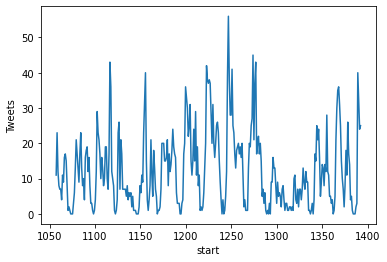

In [28]:
sns.lineplot(model.real_tweets_train.start,model.real_tweets_train.Tweets)

<BarContainer object of 4 artists>

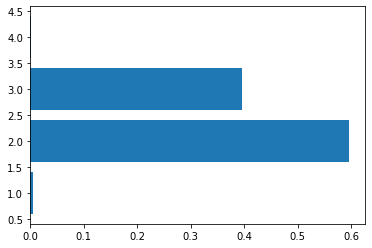

In [29]:
V,C=np.unique([model.Tweets[i]['sentiment'] for i in model.Tweets],return_counts=True)
C=C/C.sum()
plt.barh(V,C)

In [30]:
model.compute_Beta()

103.91277882821677
[14. 14.  6.  6.  0.  4. 28.]
103.91277882821677


array([-0.50796182, -0.51147684,  4.86283669, -4.21839115,  0.        ,
       -5.20825709,  2.27365143])

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

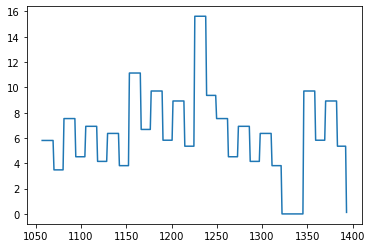

In [33]:
sns.lineplot(model.t_train,back_ground(model.Beta,model.t_train,model.f_covariates))

<AxesSubplot:>

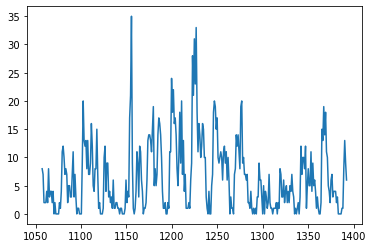

In [34]:
T_O=count_tweets([model.Tweets[i]['times'][0] for i in model.keys_train],model.t_train)
sns.lineplot(x=model.t_train[:-1],y=T_O)

In [35]:
P_L,P_V=get_particion(model.train_start,model.train_end,model.f_covariates)

In [36]:
pd.DataFrame([[i]+list(model.f_covariates(i)[[0,1]]) for i in P_V],columns=['time','Santa fe','fechas especiales'])

,time,Santa fe,fechas especiales
0,1063.742736,0.333333,0.0
1,1075.778557,0.333333,1.0
2,1087.814378,0.500000,0.0
3,1099.850199,0.500000,1.0
4,1111.886020,0.666667,0.0
5,1123.921841,0.666667,1.0
6,1135.957662,0.833333,0.0
7,1147.993483,0.833333,1.0
8,1160.029303,1.000000,0.0
9,1172.065124,1.000000,1.0


In [37]:
model.infectious_rate_fit()

(array([ 1.54420386e-02, -9.21879903e+01,  2.74548977e+00]),
 <function modelo_tweets.get_infectious_rate_fitted.<locals>.<lambda>(t, t0, p0, s)>,
 0.11812796144974476)

In [38]:
model.p_est

{'1111116350909489154': [array([1.45997289, 0.        , 0.        , 0.        , 3.47711557]),
  array([230.26666667, 234.29073818, 238.31480969, 242.3388812 ,
         246.36295271])],
 '1111757394533593088': [array([7.50390141, 0.20390031, 0.        , 1.09135644, 0.31219322]),
  array([272.72111111, 276.73724811, 280.75338511, 284.7695221 ,
         288.7856591 ])],
 '1120798960237600768': [array([8.7579074 , 1.34940907, 0.        , 0.01795573, 0.        ,
         0.        , 0.28432184, 0.        , 0.        , 0.05169533]),
  array([871.52055556, 875.56476314, 879.60897071, 883.65317829,
         887.69738587, 891.74159345, 895.78580103, 899.83000861,
         903.87421619, 907.91842377])],
 '1121542718893768704': [array([20.6946787,  0.2749893]),
  array([920.77777778, 924.81577398])],
 '1122275839884894209': [array([1.97928806e+02, 5.94963421e+01, 2.61430689e-01, 3.52556872e+01,
         3.74283290e+01, 1.17156755e+01, 1.99294869e+00, 1.58064298e-02,
         7.58870448e-02, 1.108

In [39]:
tweet=model.Tweets['1122275839884894209']
event_times=tweet['times']
t0=event_times[0]
S=tweet['sentiment']
followers=tweet['followers']#sigmoid_foll(tweet['followers'],3)
mask= event_times <= model.train_end
tweet

{'sentiment': 2,
 'times': array([ 969.33027778,  969.33972222,  969.35055556,  969.37638889,
         969.40611111,  969.49694444,  969.49694444,  969.51277778,
         969.55694444,  969.57555556,  969.59194444,  969.60027778,
         969.60111111,  969.61666667,  969.65583333,  969.69722222,
         969.71055556,  969.73277778,  969.73833333,  969.74055556,
         969.74138889,  969.75361111,  969.75583333,  969.79166667,
         969.79555556,  969.79805556,  969.83833333,  969.89222222,
         969.89722222,  969.90694444,  969.92527778,  969.94611111,
         969.95277778,  969.95805556,  969.97888889,  969.99972222,
         970.01805556,  970.12527778,  970.12722222,  970.12861111,
         970.13388889,  970.13583333,  970.22694444,  970.23333333,
         970.26027778,  970.26638889,  970.27      ,  970.37916667,
         970.38111111,  970.39805556,  970.40805556,  970.41138889,
         970.41972222,  970.43111111,  970.48083333,  970.49583333,
         970.49861111,

<AxesSubplot:>

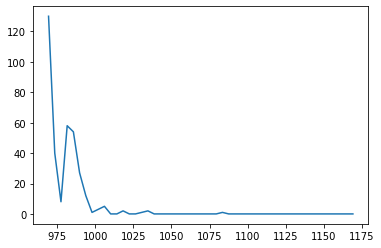

In [40]:
num_=int((model.train_end-t0)/4)
time_x=np.linspace(t0, model.train_end,num=num_)
sns.lineplot(x=time_x[:50],y=count_tweets(event_times,time_x)[:50])

In [41]:
p_i_est,t_points=estimate_infectious_rate_vec(event_times[mask], followers[mask], integral_zhao, model.train_end,4)

In [42]:
p_i_est

array([1.97928806e+02, 5.94963421e+01, 2.61430689e-01, 3.52556872e+01,
       3.74283290e+01, 1.17156755e+01, 1.99294869e+00, 1.58064298e-02,
       7.58870448e-02, 1.10871936e+00, 0.00000000e+00, 0.00000000e+00,
       2.22166960e-01, 0.00000000e+00, 0.00000000e+00, 6.59264579e-02,
       4.05089504e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.69844020e-01])

In [43]:
t_points

array([ 969.33027778,  973.40617254,  977.48206731,  981.55796207,
        985.63385684,  989.7097516 ,  993.78564637,  997.86154113,
       1001.9374359 , 1006.01333066, 1010.08922543, 1014.16512019,
       1018.24101496, 1022.31690972, 1026.39280449, 1030.46869925,
       1034.54459402, 1038.62048878, 1042.69638355, 1046.77227831,
       1050.84817308, 1054.92406784, 1058.99996261, 1063.07585737,
       1067.15175214, 1071.2276469 , 1075.30354167, 1079.37943643,
       1083.4553312 ])

<AxesSubplot:>

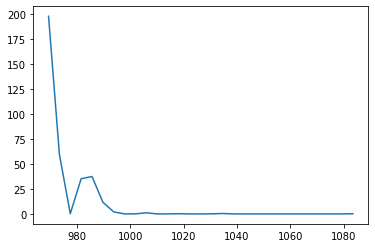

In [44]:
sns.lineplot(x=t_points,y=p_i_est)

<AxesSubplot:>

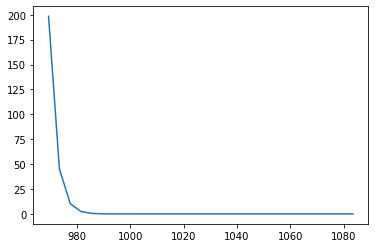

In [45]:
sns.lineplot(x=t_points,y=infectious_rate_tweets_vec(t_points,1.54420386e-02, -9.21879903e+01,  2.74548977e+00,24,t0,p_i_est[0],(5-S)/5))

In [46]:
LT,TT=model.compute_lambda_train()

In [47]:
max(LT)

600.3177353150763

In [48]:
TT

,start,end,Tweets
0,1057.223333,1058.226318,61.413734
1,1058.226318,1059.229303,34.381142
2,1059.229303,1060.232289,121.289593
3,1060.232289,1061.235274,32.136072
4,1061.235274,1062.238259,15.204803
...,...,...,...
330,1388.208408,1389.211393,7.065078
331,1389.211393,1390.214378,458.843363
332,1390.214378,1391.217363,587.769270
333,1391.217363,1392.220348,461.941589


/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start', ylabel='Tweets'>

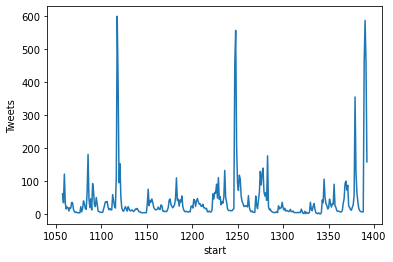

In [49]:
sns.lineplot(TT.start,TT.Tweets)

In [50]:
LP, TP = model.compute_lambda_predict()

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start'>

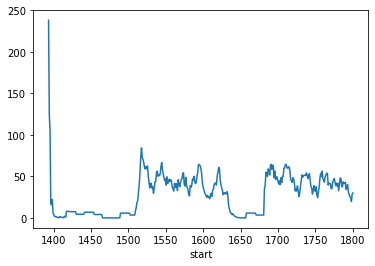

In [51]:
sns.lineplot(model.real_tweets_validate.start,LP[:-1])

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start', ylabel='Tweets'>

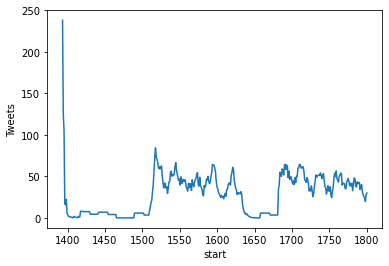

In [52]:
sns.lineplot(model.real_tweets_validate.start,TP.Tweets)

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start', ylabel='Tweets'>

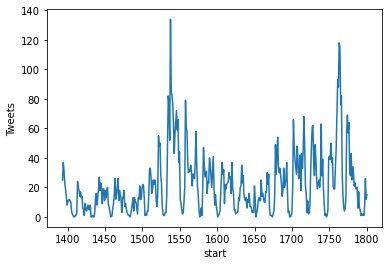

In [53]:
sns.lineplot(model.real_tweets_validate.start,model.real_tweets_validate.Tweets)

In [54]:
model.compute_errors()

/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:646: RuntimeWarning: divide by zero encountered in true_divide
  self.errors_predict['APE']=diff/real


({'APE': array([8.52392900e+00, 2.36607242e+00, 2.40531352e+00, 2.59410732e-01,
         1.67724428e-01, 6.02528422e-01, 2.82666381e-01, 6.49983841e-01,
         8.35207619e-01, 8.63562329e-01, 8.52231461e-01, 9.08370209e-01,
         8.09029921e-01, 7.87242610e-01, 7.72158141e-01,            inf,
                    inf, 7.07728577e-02, 3.26027400e-01, 8.37907750e-01,
         9.83490431e-01, 9.00818244e-01, 9.22042753e-01, 9.28637135e-01,
         5.18969308e-01, 3.86003916e-01, 4.39381737e-01, 2.92003821e-01,
         5.37278140e-01, 6.64073657e+00, 1.54561619e-01, 2.64465579e-01,
         8.92837756e-01, 2.60097151e-01, 5.58633939e-02, 5.09568248e-01,
         5.08837765e-01, 4.34454404e-01,            inf,            inf,
         3.52050451e+00,            inf,            inf, 5.06403161e-01,
         6.52383789e-01, 7.17570438e-01, 4.35152806e-01, 6.52406815e-01,
         6.35567427e-01, 7.43548626e-01, 6.15324164e-01, 6.98950011e-01,
         6.35571626e-01, 2.30652031e-01, 6.3

In [55]:
pd.DataFrame(model.errors_predict_cum).drop(['APE'],axis=1)

,MAPE,MSE,MAE,RMSE,Pearson,kendall
0,0.375169,1.974406e+06,1069.113937,1405.135751,0.996202,0.999885
1,0.375169,1.974406e+06,1069.113937,1405.135751,0.996202,0.999885
2,0.375169,1.974406e+06,1069.113937,1405.135751,0.996202,0.999885
3,0.375169,1.974406e+06,1069.113937,1405.135751,0.996202,0.999885
4,0.375169,1.974406e+06,1069.113937,1405.135751,0.996202,0.999885
...,...,...,...,...,...,...
402,0.375169,1.974406e+06,1069.113937,1405.135751,0.996202,0.999885
403,0.375169,1.974406e+06,1069.113937,1405.135751,0.996202,0.999885
404,0.375169,1.974406e+06,1069.113937,1405.135751,0.996202,0.999885
405,0.375169,1.974406e+06,1069.113937,1405.135751,0.996202,0.999885


[Text(0.5, 0, 'Time (Hours)'), Text(0, 0.5, 'APE')]

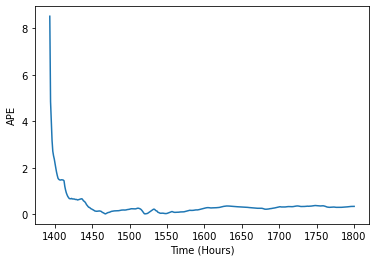

In [56]:
len(model.errors_predict_cum['APE']),len(model.t_pred)
ax=sns.lineplot(x=model.t_pred[:-1],y=model.errors_predict_cum['APE'])
ax.set(xlabel='Time (Hours)',ylabel='APE')

In [57]:
model.errors_predict['MSE'],model.errors_predict['MAE']

(677.5843528743693, 18.717433378372554)

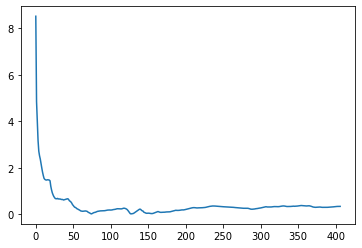

In [58]:
plt.plot(model.errors_predict_cum['APE'])

In [59]:
model.errors_predict_cum['MAPE'],model.errors_predict_cum['MAE']

(0.37516865115124326, 1069.1139373625306)

In [54]:
model.train()

4.328096770568223e-10


(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.43825732,
        -0.63495587,  2.43740769]),
 array([-0.99913558,  2.40394032,  1.90974638]),
 0.9993636400493907,
 array([15.81908436, 16.59989584, 17.35277241, 17.08549528, 16.49924679,
        16.35028884, 15.6409468 , 16.76374936, 16.18206934, 15.5373425 ,
        15.40176108, 15.46063932, 15.4004563 ,  8.14682737,  8.12315751,
         8.12477385,  8.13015002,  8.12843496,  8.12664757,  8.20264468,
         8.33022715,  8.4548859 ,  8.57762936, 10.03037274, 17.98159916,
        21.14220763, 20.8426495 , 18.45303949, 18.45912589, 17.84019832,
        16.83982082, 17.06706751, 17.20505299, 16.84793528, 16.62799412,
        16.75994901, 16.50909122,  8.74011752,  8.73794721,  8.7382934 ,
         8.73858053,  8.73938517,  8.89086015,  8.74995987,  8.76623023,
         8.8733113 ,  8.95802848,  9.34775245, 17.81757623, 21.17596713,
        18.75442359, 17.9850955 , 17.86051708, 17.79012756, 17.8092509 ,
        18.1631157

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start'>

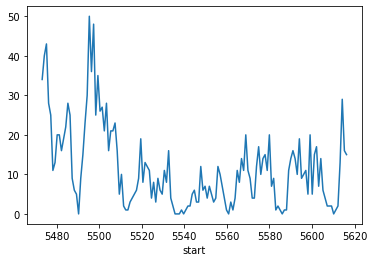

In [77]:
sns.lineplot(model.real_tweets_train.start,count_tweets(np.array([ model.Tweets[i]['times'][0] for i in model.keys_train_in ]),model.t_train))

In [56]:
A,B=model.compute_lambda_predict()

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start', ylabel='Tweets'>

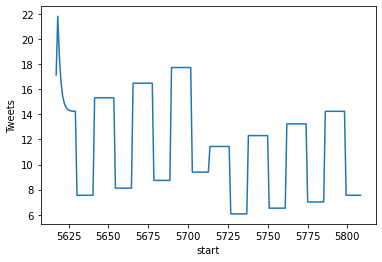

In [57]:
sns.lineplot(B.start,B.Tweets)

In [58]:
model.Tweets_pred

,start,end,Tweets
0,5617.223333,5618.228569,17.146236
1,5618.228569,5619.233805,21.829004
2,5619.233805,5620.239040,18.625543
3,5620.239040,5621.244276,16.585503
4,5621.244276,5622.249511,15.514477
...,...,...,...
186,5804.197155,5805.202391,7.550248
187,5805.202391,5806.207627,7.550248
188,5806.207627,5807.212862,7.550248
189,5807.212862,5808.218098,7.550248


In [42]:
model.compute_errors()

/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:644: RuntimeWarning: divide by zero encountered in true_divide
  self.errors_predict['APE']=diff/real


({'APE': array([5.45766557e-01, 1.24016328e+00, 2.22221707e+00, 2.90971386e+00,
         2.04050949e+00, 2.01707942e+00, 1.57698828e+00, 1.68503576e+00,
         4.28977895e+00, 2.07954119e+00, 2.59230798e+00, 1.75547024e+00,
         2.03399506e+00, 4.69140004e+00, 1.12915396e+01, 1.50312501e+01,
         2.58824437e+01, 1.43056860e+01, 4.09409374e+01, 6.70048071e+00,
         3.16835092e+00, 1.11066574e+00, 5.63856698e-01, 2.36510815e-01,
         1.71727741e+00, 1.53612343e+00, 2.93417236e+00, 2.64284076e+00,
         6.56527834e+00, 2.46446584e+00, 6.67177258e+00, 7.26108401e+00,
         1.45921206e-02, 7.06249933e-02, 1.82496998e-01, 4.45679474e-01,
         1.02312668e+00, 2.36239836e+00, 1.90159887e+00, 2.31169862e+01,
         1.29164424e+01, 9.54211764e+00, 3.79975472e+01, 6.38631935e+00,
         2.29017387e-01, 7.14691570e-02, 1.38115455e-01, 1.78632255e-01,
         4.24599922e-01, 6.80194533e-01, 2.27978382e+00, 4.68873892e+00,
         3.93904692e+00, 3.27268077e+00, 4.5

In [43]:
model.errors_predict['MAPE']
model.errors_predict['Pearson']
model.errors_predict_cum['MAPE']
model.errors_predict_cum['Pearson']

0.9895624069710519

In [44]:
sns.lineplot(B.start,model.errors_predict['APE'])
model.errors_predict['APE'].mean()

NameError: name 'B' is not defined

In [62]:
model.method_pred = 'thinning'

In [63]:
C,D=model.compute_lambda_predict()

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start', ylabel='Tweets'>

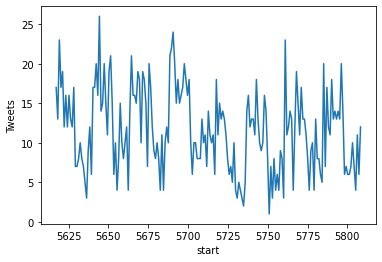

In [64]:
sns.lineplot(D.start,D.Tweets)

In [65]:
model.compute_errors()

({'APE': array([ 0.37037037,  0.69047619,  0.11538462,  0.05555556,  0.05      ,
          0.14285714,  0.77464789,  0.83333333,  0.81395349,  0.83950617,
          0.85882353,  0.75      ,  0.76666667,  0.84090909,  0.46666667,
          2.33333333,  7.        ,  0.4       ,  0.16666667,  0.86956522,
          0.8       ,  0.84210526,  0.86956522,  0.58536585,  0.34615385,
          0.42857143,  0.44827586,  0.16129032,  0.3       ,  0.54545455,
          0.04761905,  0.11764706,  0.35294118,  0.05      ,  0.22222222,
          0.48275862,  0.66666667,  0.47368421,  0.33333333,  3.        ,
         14.        ,  2.33333333,  1.66666667,  0.25      ,  0.53846154,
          0.90697674,  0.65      ,  0.41666667,  0.30434783,  0.62790698,
          0.65116279,  0.47222222,  0.37931034,  0.66666667,  0.75324675,
          0.66037736,  0.74576271,  0.87931034,  0.58333333,  0.55263158,
          0.72093023,  0.55      ,  1.        ,  0.28571429,  0.33333333,
          1.        ,  0.222222

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0.5860534308762633

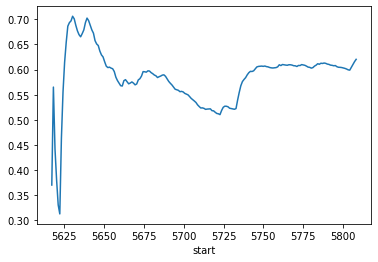

In [66]:
sns.lineplot(B.start,model.errors_predict_cum['APE'])
model.errors_predict_cum['APE'].mean()

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 0, 'Time (Hours)')]

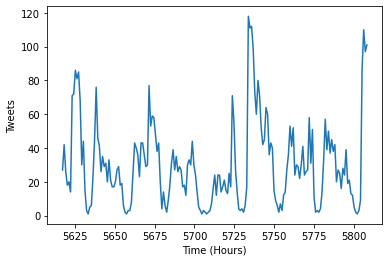

In [67]:
ax=sns.lineplot(model.real_tweets_validate.start,model.real_tweets_validate.Tweets)
ax.set(xlabel='Time (Hours)')
# plt.savefig("results/figures/ej_timeline.pdf")

In [68]:
D

,start,end,Tweets
0,5617.223333,5618.228569,17
1,5618.228569,5619.233805,13
2,5619.233805,5620.239040,23
3,5620.239040,5621.244276,17
4,5621.244276,5622.249511,19
...,...,...,...
186,5804.197155,5805.202391,7
187,5805.202391,5806.207627,4
188,5806.207627,5807.212862,11
189,5807.212862,5808.218098,6
